# Weight Initialization
* source from keras examples 
* https://keras.io/examples/reuters_mlp_relu_vs_selu/

## Import Packages

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.noise import AlphaDropout
from keras.preprocessing.text import Tokenizer


## Global Parameters

In [3]:
max_words = 1000
batch_size = 16
epochs = 40
plot = True

## 'create_network' function definition

In [24]:
def create_network(n_dense=6,
                   dense_units=16,
                   activation='selu',
                   dropout=AlphaDropout,
                   dropout_rate=0.1,
                   kernel_initializer='lecun_normal',
                   optimizer='adam',
                   num_classes=1,
                   max_words=max_words):
    # sequential
    model = Sequential()
    
    # input layer
    model.add(Dense(dense_units, input_shape=(max_words,),
                    kernel_initializer=kernel_initializer))
    model.add(Activation(activation))
    model.add(dropout(dropout_rate))
    
    # hidden layers
    for i in range(n_dense - 1):
        model.add(Dense(dense_units, kernel_initializer=kernel_initializer))
        model.add(Activation(activation))
        model.add(dropout(dropout_rate))
        
    # output layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

## Create relu and selu network

In [20]:
network_relu = {
    'n_dense': 6,
    'dense_units': 16,
    'activation':'relu',
    'dropout': Dropout,
    'dropout_rate': 0.5,
    'kernel_initializer': 'glorot_uniform',
    'optimizer': 'sgd'
}

network_selu = {
    'n_dense': 6,
    'dense_units': 16,
    'activation':'selu',
    'dropout': AlphaDropout,
    'dropout_rate': 0.1,
    'kernel_initializer': 'lecun_normal',
    'optimizer': 'sgd'
}

## Load Data

In [14]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
8982 train sequences
2246 test sequences


## Vectorizing sequence data

In [15]:
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

print('Vectorizing...')
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

46 classes
Vectorizing...
x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


## Convert class vector to binary class matrix

In [16]:
print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (8982, 46)
y_test shape: (2246, 46)


## Building network_relu

In [25]:
print('\nBuilding network relu...')

model_relu = create_network(num_classes=num_classes, **network_relu)
history_model_relu = model_relu.fit(x_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.1)

score_model_relu = model_relu.evaluate(x_test,
                               y_test,
                               batch_size=batch_size,
                               verbose=1)


Building network relu...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 8083 samples, validate on 899 samples
Epoch 1/40
8083/8083 [==============================] - 2s 206us/step - loss: 3.2127 - acc: 0.3088 - val_loss: 2.6763 - val_acc: 0.3315
Epoch 2/40
8083/8083 [==============================] - 1s 128us/step - loss: 2.5515 - acc: 0.3501 - val_loss: 2.3658 - val_acc: 0.3315
Epoch 3/40
8083/8083 [==============================] - 1s 125us/step - loss: 2.3512 - acc: 0.3542 - val_loss: 2.2176 - val_acc: 0.3315
Epoch 4/40
8083/8083 [==============================] - 1s 120us/step - loss: 2.2616 - acc: 0.3969 - val_loss: 2.1382 - val_acc: 0.4739
Epoch 5/40
8083/8083 [==============================] - 1s 134us/step - loss: 2.2086 - acc: 0.4341 - val_loss: 2.1007 - val_acc: 0.4828
Epoch 6/40
8

## Building network_selu

In [26]:
print('\nBuilding network selu...')
model_selu = create_network(num_classes=num_classes, **network_selu)

history_model_selu = model_selu.fit(x_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.1)

score_model_selu = model_selu.evaluate(x_test,
                               y_test,
                               batch_size=batch_size,
                               verbose=1)


Building network selu...
Train on 8083 samples, validate on 899 samples
Epoch 1/40
8083/8083 [==============================] - 3s 366us/step - loss: 2.8115 - acc: 0.2947 - val_loss: 2.5983 - val_acc: 0.3326
Epoch 2/40
8083/8083 [==============================] - 2s 237us/step - loss: 2.3098 - acc: 0.3855 - val_loss: 1.9794 - val_acc: 0.5039
Epoch 3/40
8083/8083 [==============================] - 2s 233us/step - loss: 2.0942 - acc: 0.4522 - val_loss: 1.9449 - val_acc: 0.5128
Epoch 4/40
8083/8083 [==============================] - 2s 237us/step - loss: 1.9826 - acc: 0.4861 - val_loss: 1.8409 - val_acc: 0.5606
Epoch 5/40
8083/8083 [==============================] - 2s 237us/step - loss: 1.9111 - acc: 0.5070 - val_loss: 1.8321 - val_acc: 0.5651
Epoch 6/40
8083/8083 [==============================] - 2s 248us/step - loss: 1.8696 - acc: 0.5169 - val_loss: 1.8536 - val_acc: 0.5640
Epoch 7/40
8083/8083 [==============================] - 2s 240us/step - loss: 1.8182 - acc: 0.5322 - val_loss: 

## Print result

In [27]:
print('---Network relu results---')
print('Hyperparameters:', network_relu)
print('Test score:', score_model_relu[0])
print('Test accuracy:', score_model_relu[1])

print('---Network selu results---')
print('Hyperparameters:', network_selu)
print('Test score:', score_model_selu[0])
print('Test accuracy:', score_model_selu[1])

---Network relu results---
Hyperparameters: {'n_dense': 6, 'dense_units': 16, 'activation': 'relu', 'dropout': <class 'keras.layers.core.Dropout'>, 'dropout_rate': 0.5, 'kernel_initializer': 'glorot_uniform', 'optimizer': 'sgd'}
Test score: 1.90460270192086
Test accuracy: 0.5155832591538756
---Network selu results---
Hyperparameters: {'n_dense': 6, 'dense_units': 16, 'activation': 'selu', 'dropout': <class 'keras.layers.noise.AlphaDropout'>, 'dropout_rate': 0.1, 'kernel_initializer': 'lecun_normal', 'optimizer': 'sgd'}
Test score: 1.614619838904825
Test accuracy: 0.641585040124314


## Draw plot

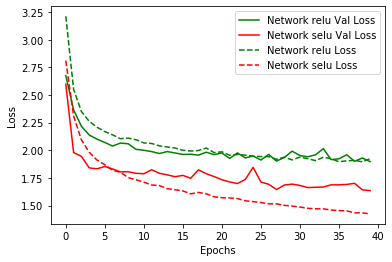

In [28]:
plt.plot(range(epochs),
         history_model_relu.history['val_loss'],
         'g-',
         label='Network relu Val Loss')
plt.plot(range(epochs),
         history_model_selu.history['val_loss'],
         'r-',
         label='Network selu Val Loss')
plt.plot(range(epochs),
         history_model_relu.history['loss'],
         'g--',
         label='Network relu Loss')
plt.plot(range(epochs),
         history_model_selu.history['loss'],
         'r--',
         label='Network selu Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()